In [1]:
import os
import pandas as pd
import math

# folder path
dir_path  = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/to_ceci/'
save_path = '/home/cecilia/repos/mogp_with_terms/moeir_comparison/'

In [2]:
df_ave_data = pd.DataFrame()

path_pr = "".join([dir_path, "Precision@10.csv"])
# read text file into pandas DataFrame
df_ave_data = pd.read_csv(path_pr, header=0, sep=',')


## set the 'topic' column as index
df_ave_data.columns = ['topic','0', '1', '2', '3', '4','5']
df_ave_data.set_index('topic', inplace=True)
#df_ave_data = df_ave_data.sort_values(by='topic', ascending=True)

df_ave_data = df_ave_data.drop(['1', '2', '3', '4','5'], axis=1)

df_ave_data = df_ave_data.transpose()
df_ave_data.to_csv(save_path + 'moeir_precision10_evaluation_by_run_gen_1.csv')

df_ave_data

topic,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
0,0.130667,0.097,0.036,0.019,0.04,0.026,0.0,0.146,0.003,0.0,...,0.0,0.034,0.037,0.086,0.143,0.0,0.013,0.109,0.013,0.0


In [3]:

stats_by_topic = df_ave_data.agg(['mean', 'count', 'std'])
stats_by_topic

,1,134,187,215,221,25,259,289,350,363,...,476,528,529,537,538,556,561,58,586,99
mean,0.130667,0.097,0.036,0.019,0.04,0.026,0.0,0.146,0.003,0.0,...,0.0,0.034,0.037,0.086,0.143,0.0,0.013,0.109,0.013,0.0
count,1.000000,1.000,1.000,1.000,1.00,1.000,1.0,1.000,1.000,1.0,...,1.0,1.000,1.000,1.000,1.000,1.0,1.000,1.000,1.000,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
stats_all_topics =stats_by_topic.transpose()
stats_all_topics

,mean,count,std
1,0.130667,1.0,NaN
134,0.097000,1.0,NaN
187,0.036000,1.0,NaN
215,0.019000,1.0,NaN
221,0.040000,1.0,NaN
25,0.026000,1.0,NaN
259,0.000000,1.0,NaN
289,0.146000,1.0,NaN
350,0.003000,1.0,NaN
363,0.000000,1.0,NaN


In [5]:
stats_all_topics['mean'].describe().transpose()


t = pd.DataFrame({  'mean_prec': [stats_all_topics['mean'].mean()],                    
                    'count_prec': [stats_all_topics['mean'].count()],
                    'std_prec': [stats_all_topics['mean'].std()]})

ci95_hi = []
ci95_lo = []

m, c, s = t.loc[0]

ci95_hi.append(m + 1.96*s/math.sqrt(c))
ci95_lo.append(m - 1.96*s/math.sqrt(c))

t['ci95_lo_prec'] = ci95_lo
t['ci95_hi_prec'] = ci95_hi


t.to_csv(save_path + 'moeir_precision10_evaluation_stats_gen_1.csv')
t

,mean_prec,count_prec,std_prec,ci95_lo_prec,ci95_hi_prec
0,0.053667,25,0.060438,0.029975,0.077358


Text(0.5, 0.98, 'Precision@10  - MOEIR ')

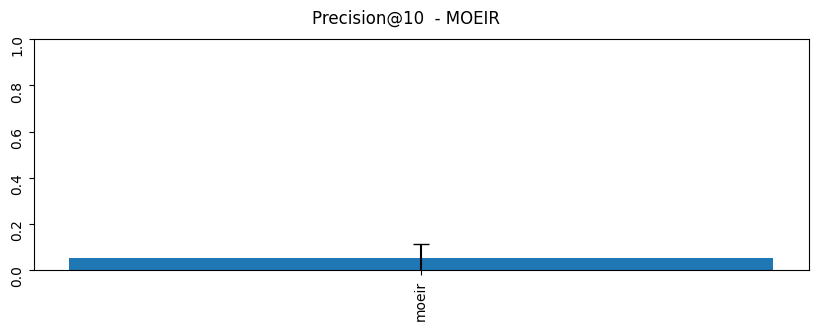

In [6]:
######### PRECISION @ 10
import matplotlib.pyplot as plt


fig, axs = plt.subplots(1,1, figsize=(10, 3), sharey=False)
axs.tick_params(labelrotation=90)
axs.bar('moeir', t['mean_prec'], yerr=t['std_prec'], capsize=6)
axs.set_ylim(0,1)
fig.suptitle('Precision@10  - MOEIR ')